In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Creating a binary classification dataset using make_classification function

In [17]:
from sklearn.datasets import make_classification

In [30]:
X,y=make_classification(n_samples=1000,n_features=2,n_redundant=0,n_clusters_per_class=1,weights=[0.9],random_state=12)

In [31]:
X

array([[-0.76289759, -0.70680807],
       [-1.07543571, -1.0511621 ],
       [-0.61011459, -0.90980157],
       ...,
       [-1.32643852, -1.815178  ],
       [-0.83348573, -0.5146474 ],
       [-0.30287558, -0.57597532]])

In [32]:
## So we have created arrays of independent and dependent dataset

In [33]:
df1=pd.DataFrame(X,columns=['f1','f2'])

In [34]:
df1.head()

,f1,f2
0,-0.762898,-0.706808
1,-1.075436,-1.051162
2,-0.610115,-0.909802
3,-2.023284,-0.428945
4,-0.812921,-1.316206


In [35]:
df2=pd.DataFrame(y,columns=['target'])

In [36]:
df2.head()

,target
0,0
1,0
2,0
3,1
4,0


In [37]:
df=pd.concat([df1,df2],axis=1)

In [38]:
df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [43]:
### Hence we have created a binary classification dataframe df

In [44]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

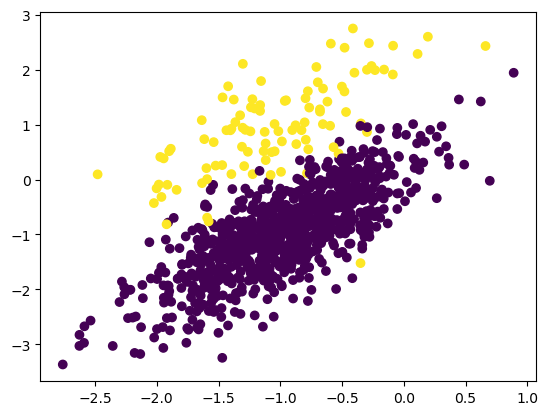

In [46]:
plt.scatter(df['f1'],df['f2'],c=df['target'])

In [47]:
# now applying SMOTE for this imbalanced dataset

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
oversample=SMOTE()

In [52]:
X_over,y_over=oversample.fit_resample(df[['f1','f2']],df['target'])

In [53]:
X_over.head()

,f1,f2
0,-0.762898,-0.706808
1,-1.075436,-1.051162
2,-0.610115,-0.909802
3,-2.023284,-0.428945
4,-0.812921,-1.316206


In [54]:
y_over.head()

0    0
1    0
2    0
3    1
4    0
Name: target, dtype: int32

In [55]:
y_over.shape

(1800,)

In [59]:
len(y_over[y_over==1])

900

In [60]:
len(y_over[y_over==0])

900

In [61]:
## Creating a dataframe of this oversampled data

In [63]:
df_oversampled=pd.concat([X_over,y_over],axis=1)

In [65]:
df_oversampled.shape

(1800, 3)

In [66]:
df_oversampled.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [67]:
## So we have created a oversampled dataset using SMOTE

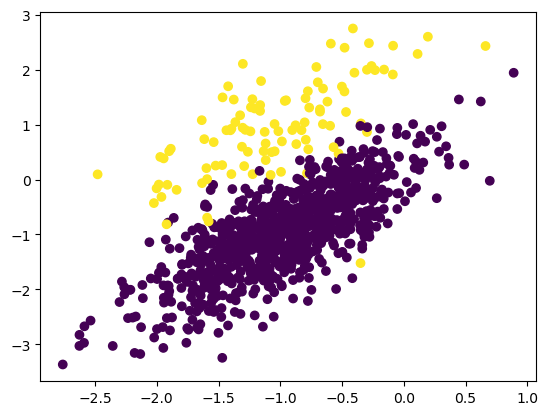

In [71]:
plt.scatter(df['f1'],df['f2'],c=df['target'])

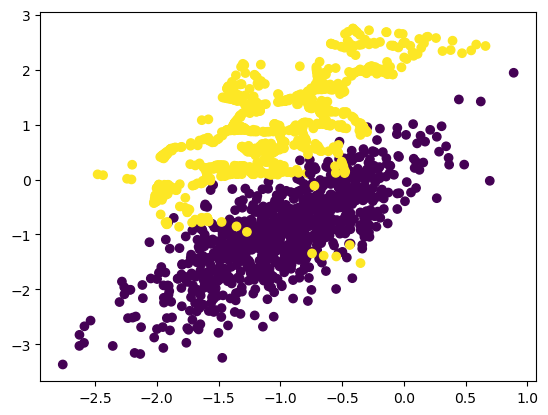

In [70]:
plt.scatter(df_oversampled['f1'],df_oversampled['f2'],c=df_oversampled['target'])

In [72]:
## We can verify that new datapoints are created on the line joining the two nearest datapoints

### Upsampling above data without SMOTE

In [75]:
df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [76]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [80]:
df_minority=df[df['target']==1]

In [83]:
df_minority.shape

(100, 3)

In [84]:
df_majority=df[df['target']==0]

In [85]:
from sklearn.utils import resample

In [87]:
df_minority_upsampled=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)

In [90]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled]).reset_index(drop=True)

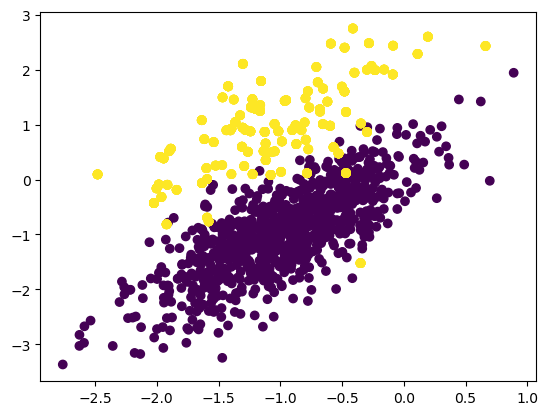

In [91]:
plt.scatter(df_upsampled['f1'],df_upsampled['f2'],c=df_upsampled['target'])

In [92]:
### Here the new datapoints are created but on the same position as previous ones